In [4]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X,y=make_blobs(random_state=42)

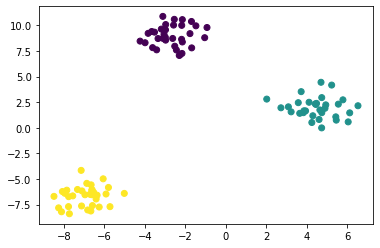

In [6]:
t=plt.scatter(X[:, 0],( X[:, 1]), c=y)

In [7]:
X.shape

(100, 2)

In [8]:
y.shape

(100,)

In [18]:
class KNNCustom:
    def __init__(self,n_neighbours=5):
        l=[]
        self.n_neighbours=n_neighbours
        self._X=None
        self._y=None
    def fit(self,X,y):
        self._X=X
        self._y=y
    def predict_point(self,point):
        l=[]
        for x_point,y_point in zip(self._X,self._y):
            dis_point=np.sqrt(((point-x_point)**2).sum())
            l.append((dis_point,y_point))
        sorted_list=sorted(l)
        top_k=l[:self.n_neighbours]
        item,counts=np.unique(np.array(top_k)[:,1],return_counts=True)
        return (item[np.argmax(counts)])
    def predict(self,X):
        results=[]
        for i in X:
            results.append(self.predict_point(i))
        return np.array(results,dtype=int)
    def score(self,X,y):
        return sum(self.predict(X)==1)/len(y)
        

In [19]:
model=KNNCustom()

In [20]:
model.fit(X,y)

In [21]:
model.predict_point(X[:10])

1.0

In [23]:
model.score(X,y)

1.0